# Stanford CME 241 (Winter 2025) - Assignment 1

**Due: Tuesday, January 21 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/imrisek-viktor/CME-241/Imrisek_assignment1.ipynb

*Group members (replace below names with people in your group):* 
- Viktor Imrisek

## Imports

In [54]:
from __future__ import annotations
import graphviz
from abc import ABC, abstractmethod
from collections import defaultdict
from dataclasses import dataclass
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
from typing import (Callable, Dict, Iterable, Generic, Sequence, Tuple,
                    Mapping, TypeVar, Set)

from rl.distribution import (Categorical, Distribution, FiniteDistribution,
                             SampledDistribution)
from rl.markov_process import FiniteMarkovProcess, MarkovProcess, NonTerminal

## Question 1: Snakes and Ladders (Led by Viktor Imrisek)

In the classic childhood game of Snakes and Ladders, all players start to the left of square 1 (call this position 0) and roll a 6-sided die to represent the number of squares they can move forward. The goal is to reach square 100 as quickly as possible. Landing on the bottom rung of a ladder allows for an automatic free-pass to climb, e.g. square 4 sends you directly to 14; whereas landing on a snake's head forces one to slide all the way to the tail, e.g. square 34 sends you to 6. Note, this game can be viewed as a Markov Process, where the outcome is only depedent on the current state and not the prior trajectory. In this question, we will ask you to both formally describe the Markov Process that describes this game, followed by coding up a version of the game to get familiar with the RL-book libraries.


### Problem Statement

How can we model this problem with a Markov Process?

---

### Subquestions

#### Part (A): MDP Modeling

Formalize the state space of the Snakes and Ladders game. Don't forget to specify the terminal state!

---

#### Part (B): Transition Probabilities

Write out the structure of the transition probabilities. Feel free to abbreviate all squares that do not have a snake or ladder.

---

#### Part (C): Modeling the Game

Code up a `transition_map: Transition[S]` data structure to represent the transition probabilities of the Snakes and Ladders Markov Process so you can model the game as an instance of `FiniteMarkovProcess`. Use the `traces` method to create sampling traces, and plot the graph of the distribution of time steps to finish the game. Use the image below for the locations of the snakes and ladders.



---

![Snakes and ladders](figures\snakesAndLadders.png)

### Part (A) Answer
The state space $\mathcal{S} = \{0, 1,2,\ldots, 100\}$ is a set of squares from $0$ to $100$, where $0$ is the starting position left of square $1$. The terminal state $\mathcal{T}$ is the square $100$.

### Part (B) Answer
By throwing a die we can get to $6$ different squares with equal probability. The only exception is when we are close to $100$, so when we overshoot we end up on $100$. Notice that 5 out of 6 transition probabilities from a square $n+1$ are the same as for square $n$. The transition probabilities $\mathcal{P}: \mathcal{N} \cdot \mathcal{S} \rightarrow [0, 1]$ are:

$$\mathcal{P}(s_0, s_{38}) = \frac{1}{6}, \mathcal{P}(s_0, s_2) = \frac{1}{6}, \mathcal{P}(s_0, s_3) = \frac{1}{6}, \mathcal{P}(s_0, s_{14}) = \frac{1}{6}, \mathcal{P}(s_0, s_5) = \frac{1}{6}, \mathcal{P}(s_0, s_6) = \frac{1}{6}$$

$$\mathcal{P}(s_1, s_2) = \frac{1}{6}, \mathcal{P}(s_1, s_3) = \frac{1}{6}, \mathcal{P}(s_1, s_{14}) = \frac{1}{6}, \mathcal{P}(s_1, s_5) = \frac{1}{6}, \mathcal{P}(s_1, s_6) = \frac{1}{6}, \mathcal{P}(s_1, s_7) = \frac{1}{6}$$

$$\mathcal{P}(s_2, s_3) = \frac{1}{6}, \mathcal{P}(s_2, s_{14}) = \frac{1}{6}, \mathcal{P}(s_2, s_5) = \frac{1}{6}, \mathcal{P}(s_2, s_6) = \frac{1}{6}, \mathcal{P}(s_2, s_7) = \frac{1}{6}, \mathcal{P}(s_2, s_10) = \frac{1}{6}$$
$$ \ldots $$

An easier thing to do, is to send $s$ to $s+i$ for $i \in [1,2,3,4,5,6]$ with equal probabilities. Then what we can do is to edit this for beginings of snakes and ladders.

### Part (C) Answer

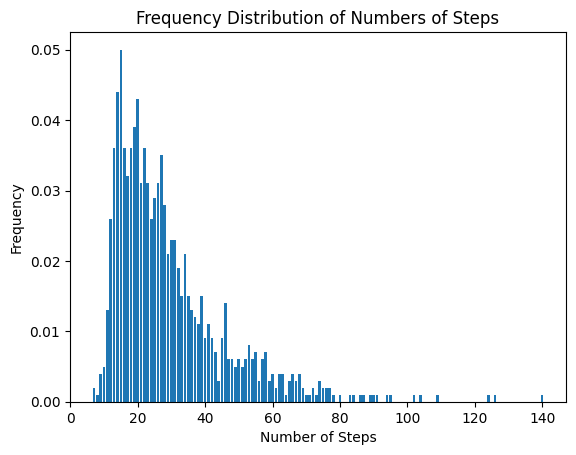

In [46]:
transition_map = {s : Categorical({s + 1:1/6, s + 2 : 1/6, s + 3:1/6, s + 4 : 1/6, s + 5:1/6, s + 6 : 1/6 }) for s in range(0,100)}
# encode the ladders
transition_map[1] = Categorical({38 : 1})
transition_map[4] = Categorical({14 : 1})
transition_map[8] = Categorical({10 : 1})
transition_map[21] = Categorical({42 : 1})
transition_map[28] = Categorical({76 : 1})
transition_map[50] = Categorical({67 : 1})
transition_map[71] = Categorical({92 : 1})
transition_map[88] = Categorical({99 : 1})
# encode the snakes
transition_map[32] = Categorical({10 : 1})
transition_map[36] = Categorical({6 : 1})
transition_map[48] = Categorical({26 : 1})
transition_map[63] = Categorical({18 : 1})
transition_map[88] = Categorical({24 : 1})
transition_map[95] = Categorical({56 : 1})
transition_map[97] = Categorical({78 : 1})
# fix the overshooting of a 100
transition_map[95] = Categorical({100 : 5/6, 99 : 1/6, 98 : 1/6, 97 : 1/6, 96 : 1/6})
transition_map[96] = Categorical({100 : 5/6, 99 : 1/6, 98 : 1/6, 97 : 1/6})
transition_map[97] = Categorical({100 : 4/6, 99 : 1/6, 98 : 1/6})
transition_map[98] = Categorical({100 : 5/6, 99 : 1/6})
transition_map[99] = Categorical({100 : 1})

markovSnake = FiniteMarkovProcess(transition_map)

specialSquares = [1, 4, 8, 21, 28, 50, 71, 88, 32, 36, 48, 63, 88, 95, 97]
trajectories = markovSnake.traces(Categorical({NonTerminal(0) : 1}))
i = 0
moveDist = defaultdict(float)
numSamples = 1000
for trajectory in trajectories:

    i += 1
    numMoves = 0
    for st in trajectory:
        # count if it is not a begining of a ladder or a snake as for those we teleport without adding time step
        if st.state not in specialSquares:
            numMoves += 1
    moveDist[numMoves] += 1/numSamples
    if i >= numSamples:
        break
# Extract keys and values from the dictionary to plot it
keys = np.array(list(moveDist.keys()))  
values = np.array(list(moveDist.values()))  
sorted_indices = np.argsort(keys)
keys = keys[sorted_indices]
values = values[sorted_indices]
plt.bar(keys, values)
plt.title("Frequency Distribution of Numbers of Steps")
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.show()
    




## Question 2: Markov Decision Processes (Led by Viktor Imrisek)

Consider an MDP with an infinite set of states $\mathcal{S} = \{1,2,3,\ldots \}$. The start state is $s=1$. Each state $s$ allows a continuous set of actions $a \in [0,1]$. The transition probabilities are given by: 
$$\mathbb{P}[s+1 \mid s, a] = a, \mathbb{P}[s \mid s, a] = 1 - a \text{ for all } s \in \mathcal{S} \text{ for all } a \in [0,1]$$
For all states $s \in \mathcal{S}$ and actions $a \in [0,1]$, transitioning from $s$ to $s+1$ results in a reward of $1-a$ and transitioning from $s$ to $s$ results in a reward of $1+a$. The discount factor $\gamma=0.5$.

### Problem Statement

How can we derive a mathematical formulation for the value function and the optimal policy? And how do those functions change when we modify the action space?

---

### Subquestions

#### Part (A): Optimal Value Function  

Using the MDP Bellman Optimality Equation, calculate the Optimal Value Function $V^*(s)$ for all $s \in \mathcal{S}$. Given $V^*(s)$, what is the optimal action, $a^*$, that maximizes the optimal value function?

---

#### Part (B): Optimal Policy  

Calculate an Optimal Deterministic Policy $\pi^*(s)$ for all $s \in \mathcal{S}$.

---

#### Part (C): Changing the Action Space  

Let's assume that we modify the action space such that instead of $a \in [0,1]$ for all states, we restrict the action space to $a \in \left[0,\frac{1}{s}\right]$ for state $s$. This means that higher states have more restricted action spaces. How does this constraint affect:

- The form of the Bellman optimality equation?
- The optimal value function, $V^*(s)$?
- The structure of the optimal policy, $\pi^*(s)$?

---

### Part (A) Answer

$$ V^*(s) = \max_{a \in [0, 1]} \Big\{ a \big[ (1 - a) + \gamma V^*(s+1) \big] + (1 - a) \big[ (1 + a) + \gamma V^*(s) \big] \Big\} $$

Since every state is symmetric, we will alwyas choose the same optimal action every time. Hence $V^*(s) = V^*(s+1)$ for all $s \in \mathcal{S}$. Thus,

$$ V^*(s) = \max_{a \in [0, 1]} \Big\{ a \big[ (1 - a) + \gamma V^*(s) \big] + (1 - a) \big[ (1 + a) + \gamma V^*(s) \big] \Big\} $$
$$ V^*(s) = \max_{a \in [0, 1]} \Big\{ a(1-a) + (1 - a)(1 + a) + \gamma V^*(s) \Big\} $$
$$ (1-\gamma)V^*(s) = \max_{a \in [0, 1]} \Big\{ a(1-a) + (1 - a)(1 + a) \Big\} $$
Substituting $\gamma = \frac{1}{2}$,
$$ V^*(s) = 2 \max_{a \in [0, 1]} \Big\{ 1 + a - 2a^2 \Big\} $$

Taking the derivative with respect to $a$ to obtain the value of $a$ that maximizes $V^*(s)$ we get
$$1 - 4a^* = 0$$
$$ a^* = \frac{1}{4}$$

Hence $V^*(s) = \frac{9}{4}$.

Another way to see this is this:
$$G_t = \sum_{i = t+1}^{\infty} \gamma^{i - t -1} R_i = R_{t+1} + \gamma R_{t+2}  + \gamma^2 R_{t+3}  + \ldots $$

Since we are taking the same action at each state, we have that $\mathbb{E}(R_n) = \mathbb{E}(R_m) = R^*$.

Hence,

$$\mathbb{E}(G_t) = \mathbb{E}(\sum_{i = t+1}^{\infty} \gamma^{i - t -1} R_i )= \sum_{i = t+1}^{\infty} \mathbb{E}(\gamma^{i - t -1} R_i) =  \sum_{i = t+1}^{\infty} \gamma^{i - t -1} R^* = 2R^*$$

Now, let's calculate the the expected value of a reward $R_a$ given action $a$.

$$\mathbb{E}(R_a) = a \cdot (1-a) + (1-a) \cdot (1+a) = a - a^2 + 1 - a^2 = 1 + a - 2a^2$$

Taking the derivative to obtain the value of $a$ leading to the highest expected $R_a$,

$$1 - 4a^* = 0$$
$$ a^* = \frac{1}{4}$$

From there we get $R^* = \frac{9}{8}$.

So, 
$$ V^* (s) = \mathbb{E}(G_{t}^{*}) = \frac{9}{4}$$

### Part (B) Answer

Since every state is symmetrical, we get that $\pi^{*} (s) = a^* = \frac{1}{4}$.

### Part (C) Answer

#### Bellman Optimality Equation Change and Optimal Value Function Change:
$$ V^*(s) = \max_{a \in [0, \frac{1}{s}]} \Big\{ a \big[ (1 - a) + \gamma V^*(s+1) \big] + (1 - a) \big[ (1 + a) + \gamma V^*(s) \big] \Big\} $$
$$ V^*(s) = \max_{a \in [0, \frac{1}{s}]} \Big\{ 1 + a - 2a^2 + a\gamma V^*(s+1) + \gamma V^*(s) - a \gamma V^*(s) \Big\} $$
taking the derivative with respect to $a$ to get a value of $a^*$:

$$1 - 4a^* + \gamma(V^*(s+1)-V^*(s))=0$$
$$a^* = \frac{1 + \gamma(V^*(s+1)-V^*(s))}{4}$$

#### Optimal Policy Change:
Since $V^*(s+1)$ has more restricted action space than $V^*(s)$, we must have $V^*(s+1)-V^*(s)<0$. To choose optimal policy, we always compare the value of $a^*$ with $\frac{1}{s}$ and choose the smaller one (this way we stay in the action space). Hence
$$\pi^* (s)=min\{\frac{1 + \gamma(V^*(s+1)-V^*(s))}{4}, \frac{1}{s}\}$$

Notice that if we set $V^*(s+1)=V^*(s)$, we get $a^* = \frac{1}{4}$ as expected from parts a and b.
Since $V^*(s+1)-V^*(s)$ will be generally small, we can guess that the policy will be close to to $min\{\frac{1}{4}, \frac{1}{s}\}$.

## Question 3: Frog in a Pond (Led by Viktor Imrisek)

Consider an array of $n+1$ lilypads on a pond, numbered $0$ to $n$. A frog sits on a lilypad other than the lilypads numbered $0$ or $n$. When on lilypad $i$ ($1 \leq i \leq n-1$), the frog can croak one of two sounds: **A** or **B**. 

- If it croaks **A** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to lilypad $i-1$ with probability $\frac{i}{n}$.
  - It is thrown to lilypad $i+1$ with probability $\frac{n-i}{n}$.
  
- If it croaks **B** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to one of the lilypads $0, \ldots, i-1, i+1, \ldots, n$ with uniform probability $\frac{1}{n}$.

A snake, perched on lilypad $0$, will eat the frog if it lands on lilypad $0$. The frog can escape the pond (and hence, escape the snake!) if it lands on lilypad $n$.

### Problem Statement

What should the frog croak when on each of the lilypads $1, 2, \ldots, n-1$, in order to maximize the probability of escaping the pond (i.e., reaching lilypad $n$ before reaching lilypad $0$)? 

Although there are multiple ways to solve this problem, we aim to solve it by modeling it as a **Markov Decision Process (MDP)** and identifying the **Optimal Policy**.

---

### Subquestions

#### Part (A): MDP Modeling

Express the frog-escape problem as an MDP using clear mathematical notation by defining the following components: 

- **State Space**: Define the possible states of the MDP. 
- **Action Space**: Specify the actions available to the frog at each state. 
- **Transition Function**: Describe the probabilities of transitioning between states for each action. 
- **Reward Function**: Specify the reward associated with the states and transitions. 

---

#### Part (B): Python Implementation

There is starter code below to solve this problem programatically. Fill in each of the $6$ `TODO` areas in the code. As a reference for the transition probabilities and rewards, you can make use of the example in slide 16/31 from the following slide deck: https://github.com/coverdrive/technical-documents/blob/master/finance/cme241/Tour-MP.pdf.

Write Python code that:

- Models this MDP.
- Solves the **Optimal Value Function** and the **Optimal Policy**.

Feel free to use/adapt code from the textbook. Note, there are other libraries that are needed to actually run this code, so running it will not do anything. Just fill in the code so that it could run assuming that the other libraries are present.

---

#### Part (C): Visualization and Analysis

After running the code, we observe the following graphs for $n=3$, $n=10$, and $n=25$:

![FrogGraphs](figures/frogGraphs.png)

What patterns do you observe for the **Optimal Policy** as you vary $n$ from $3$ to $25$? When the frog is on lilypad $13$ (with $25$ total), what action should the frog take? Is this action different than the action the frog should take if it is on lilypad $1$?

---

### Part (A) Answer

#### State Space:  
The state space contains the information about which lilypad we are on. $\mathcal{S} = \{0, \ldots, n \}$.
$0$ and $n$ are terminal, hence $\mathcal{N}=\{1,\ldots, n-1 \}$.


#### Action Space:  

Action sapce for each of the non-terminal states is $\mathcal{A}(k) = \{A,B\}$ for $k \in \mathcal{N}$. 

#### Transition Function:  

$$ P(s, A, s') = \begin{cases}
\frac{i}{n}  & \text{if} & s = i, s' = i-1 \text{  for  } i \in \mathcal{N}\\
\frac{n-i}{n} & \text{if} & s = i, s' = i + 1 \text{  for  } i \in \mathcal{N}
\end{cases}$$

$$P(s, B, s') = \begin{cases}
\frac{i}{n} & \text{if} & s=i, s'=k \text{  for  } i \neq k, i \in \mathcal{N}, k \in \mathcal{S}
\end{cases}$$

#### Reward Function:  
The only reward we get is if we escape.
$$ R(s, a, s') = \begin{cases}
0  & \text{if} & s' \neq n \\
1  & \text{if} & s' = n
\end{cases}$$

### Part (B) Answer

In [53]:
MDPRefined = dict
def j_range (i,n): #I defined this to sepcify that action B cannot lead to the same state it started from
    j_values = []
    for j in range(i):
        j_values.append(j)
    for j in range(i+1, n+1):
        j_values.append(j)
    return j_values
def get_lily_pads_mdp(n: int) -> MDPRefined:
    
    data = {
        i: {
            'A': {
                i - 1: i/n, # TODO: fill in with the correct transition probabilities
                i + 1: (n-i)/n, # TODO: fill in with the correct transition probabilities
            },
            'B': {
                j: i/n for j in j_range(i,n) # TODO: fill in with the correct transition probabilities
            }
        } for i in range(1, n)
    }
    data[0] = {} # TODO: this is the initial state, so what would be the correct transition probabilities?
    data[n] = {} # TODO: similarly, this is the terminal state, so what would be the correct transition probabilities?
    # empty since they are both terminal

    gamma = 1.0
    return MDPRefined(data, gamma)

Mapping = dict
def direct_bellman(n: int) -> Mapping[int, float]:
    vf = [0.5] * (n + 1)
    vf[0] = 0.
    vf[n] = 0.
    tol = 1e-8
    epsilon = tol * 1e4
    while epsilon >= tol:
        old_vf = [v for v in vf]
        total = sum(old_vf)
        for i in range(1, n):
            if i + 1 == n:
                reward_A = 1
            else:
                reward_A = 0
            A_value = (i / n) * old_vf[i - 1] + ((n - i) / n) * (reward_A + old_vf[i + 1])
            #separately compute actions A and B
            B_value = (1 / n) * (1 + (total - old_vf[i]))

            vf[i] = max(A_value, B_value) # TODO: fill in with the Bellman update
        epsilon = max(abs(old_vf[i] - v) for i, v in enumerate(vf))
    return {v: f for v, f in enumerate(vf)}

### Part (C) Answer

The structure of the policy stays the same. For $i,j \in [2,n-2]$ we observe $Q(i, A) \approx Q(j,A), Q(i, B) \approx Q(j , B)$ and furthermore $Q(i, A)> Q(j, B)$. For Lilypad $1$, we always have the opposite trend, namely $Q(1, A) < Q(1, B)$. For Lilipad $n-1$, we just have $Q(n-1, A)$ even bigger.

Hence we choose action B if and only if we are at Lilipad $1$. Else we choose $A$. So for lilypad 13 we choose A and for lilypad 1 we choose B.

The values of Q are roughly in the same ballpark (around $0.7$) for all graphed $n$. But the bigger the $n$ the smaller the difference between Q(A) and Q(B).

## Question 4: Manual Value Iteration (Led by Viktor Imrisek)

Consider a simple MDP with $\mathcal{S} = \{s_1, s_2, s_3\}, \mathcal{T} = \{s_3\}, \mathcal{A} = \{a_1, a_2\}$. The State Transition Probability function  
$$\mathcal{P}: \mathcal{N} \cdot \mathcal{A} \cdot \mathcal{S} \rightarrow [0, 1]$$  
is defined as:  
$$\mathcal{P}(s_1, a_1, s_1) = 0.25, \mathcal{P}(s_1, a_1, s_2) = 0.65, \mathcal{P}(s_1, a_1, s_3) = 0.1$$  
$$\mathcal{P}(s_1, a_2, s_1) = 0.1, \mathcal{P}(s_1, a_2, s_2) = 0.4, \mathcal{P}(s_1, a_2, s_3) = 0.5$$  
$$\mathcal{P}(s_2, a_1, s_1) = 0.3, \mathcal{P}(s_2, a_1, s_2) = 0.15, \mathcal{P}(s_2, a_1, s_3) = 0.55$$  
$$\mathcal{P}(s_2, a_2, s_1) = 0.25, \mathcal{P}(s_2, a_2, s_2) = 0.55, \mathcal{P}(s_2, a_2, s_3) = 0.2$$  

The Reward Function  
$$\mathcal{R}: \mathcal{N} \cdot \mathcal{A} \rightarrow \mathbb{R}$$  
is defined as:  
$$\mathcal{R}(s_1, a_1) = 8.0, \mathcal{R}(s_1, a_2) = 10.0$$  
$$\mathcal{R}(s_2, a_1) = 1.0, \mathcal{R}(s_2, a_2) = -1.0$$  

Assume a discount factor of $\gamma = 1$.

### Problem Statement

Your task is to determine an Optimal Deterministic Policy **by manually working out** (not with code) the first two iterations of the Value Iteration algorithm.

---

### Subquestions

#### Part (A): 2 Iterations

1. Initialize the Value Function for each state to be its $\max$ (over actions) reward, i.e., we initialize the Value Function to be $v_0(s_1) = 10.0, v_0(s_2) = 1.0, v_0(s_3) = 0.0$. Then manually calculate $q_k(\cdot, \cdot)$ and $v_k(\cdot)$ from $v_{k - 1}(\cdot)$ using the Value Iteration update, and then calculate the greedy policy $\pi_k(\cdot)$ from $q_k(\cdot, \cdot)$ for $k = 1$ and $k = 2$ (hence, 2 iterations).

---

#### Part (B): Argument

1. Now argue that $\pi_k(\cdot)$ for $k > 2$ will be the same as $\pi_2(\cdot)$. *Hint*: You can make the argument by examining the structure of how you get $q_k(\cdot, \cdot)$ from $v_{k-1}(\cdot)$. With this argument, there is no need to go beyond the two iterations you performed above, and so you can establish $\pi_2(\cdot)$ as an Optimal Deterministic Policy for this MDP.

---

#### Part (C): Policy Evaluation

1. Using the policy $\pi_2(\cdot)$, compute the exact value function $V^{\pi_2}(s)$ for all $s\in S$.

---

#### Part (D): Sensitivity Analysis

Assume the reward for $R(s_1, a_2)$ is modified to $11.0$ instead of $10.0$.

1. Perform one iteration of Value Iteration starting from the initialized value function $v_0(s)$, where $v_0(s)$ remains the same as in the original problem.
2. Determine whether this change impacts the Optimal Deterministic Policy $\pi(\cdot)$. If it does, explain why.

---

### Part (A) Answer
The value iteration update is given by:

$$v_k(s) = \max_{a \in \mathcal{A}} q_k(s, a)$$
where:
$$q_k(s, a) = \mathcal{R}(s, a) + \sum_{s' \in \mathcal{S}} \mathcal{P}(s, a, s') \cdot v_{k-1}(s')$$
Initialize:
$$v_0(s_1) = 10.0, \quad v_0(s_2) = 1.0, \quad v_0(s_3) = 0.0$$

First iteration:
For $s_1, a_1$:
$$q_1(s_1, a_1) = \mathcal{R}(s_1, a_1) + \sum_{s' \in \mathcal{S}} \mathcal{P}(s_1, a_1, s') \cdot v_0(s')$$

Substituting:
$$q_1(s_1, a_1) = 8.0 + (0.25 \cdot 10.0 + 0.65 \cdot 1.0 + 0.1 \cdot 0.0) = 8.0 + (2.5 + 0.65 + 0.0) = 11.15$$

For $s_1, a_2$:

$$q_1(s_1, a_2) = \mathcal{R}(s_1, a_2) + \sum_{s' \in \mathcal{S}} \mathcal{P}(s_1, a_2, s') \cdot v_0(s')$$
Substituting:
$$q_1(s_1, a_2) = 10.0 + (0.1 \cdot 10.0 + 0.4 \cdot 1.0 + 0.5 \cdot 0.0) = 10.0 + (1.0 + 0.4 + 0.0) = 11.4$$

Thus:
$$v_1(s_1) = \max \{q_1(s_1, a_1), q_1(s_1, a_2)\} = \max \{11.15, 11.4\} = 11.4$$
$$\pi_1(s_1) = \arg\max_{a \in \mathcal{A}} \{q_1(s_1, a_1), q_1(s_1, a_2)\} = a_2$$
For $s_2, a_1$:
$$q_1(s_2, a_1) = \mathcal{R}(s_2, a_1) + \sum_{s' \in \mathcal{S}} \mathcal{P}(s_2, a_1, s') \cdot v_0(s')$$
Substituting:
$$q_1(s_2, a_1) = 1.0 + (0.3 \cdot 10.0 + 0.15 \cdot 1.0 + 0.55 \cdot 0.0) = 1.0 + (3.0 + 0.15 + 0.0) = 4.15$$

For $s_2, a_2$:
$$q_1(s_2, a_2) = \mathcal{R}(s_2, a_2) + \sum_{s' \in \mathcal{S}} \mathcal{P}(s_2, a_2, s') \cdot v_0(s')$$
Substituting:
$$q_1(s_2, a_2) = -1.0 + (0.25 \cdot 10.0 + 0.55 \cdot 1.0 + 0.2 \cdot 0.0) = -1.0 + (2.5 + 0.55 + 0.0) = 2.05$$
Thus:
$$v_1(s_2) = \max \{q_1(s_2, a_1), q_1(s_2, a_2)\} = \max \{4.15, 2.05\} = 4.15$$
$$\pi_1(s_2) = \arg\max_{a \in \mathcal{A}} \{q_1(s_2, a_1), q_1(s_2, a_2)\} = a_1$$

Finally, $v_1(s_3)=0$ since $s_3$ is terminal.

Second iteration:
$$q_2(s_1, a_1) = 8.0 + 1 \cdot (0.25 \cdot 11.4 + 0.65 \cdot 4.15 + 0.1 \cdot 0.0)= 13.55$$

$$q_2(s_1, a_2) = 10.00 + 1 \cdot (0.1 \cdot 11.4 + 0.4 \cdot 4.15 + 0.5 \cdot 0.0)= 12.8$$

$$v_2(s_1)= max(13.55, 12.8) = 13.55$$
$$\pi_2 (s_1) = a_1$$

$$q_2(s_2, a_1) = 1.0 + 1 \cdot (0.3 \cdot 11.4 + 0.15 \cdot 4.15 + 0.55 \cdot 0.0)= 5.04$$

$$q_2(s_3, a_2) = -1.0 + 1 \cdot (0.25 \cdot 11.4 + 0.55 \cdot 4.15 + 0.2 \cdot 0.0)= 4.13$$

$$v_2(s_2)= max(5.04, 4.13) = 5.04$$
$$\pi_2 (s_2) = a_1$$








### Part (B) Answer:  

Value iteration update is defined by
$$v_{k}(s) = \max_{a \in \mathcal{A}} \; q_{k}(s,a), \quad \text{where} \quad q_{k}(s,a) = \mathcal{R}(s,a) + \sum_{s' \in \mathcal{S}} \mathcal{P}(s,a,s')\, v_{k-1}(s')$$
The greedy policy at iteration $k$ is then given by
$$\pi_k(s) = \arg\max_{a \in \mathcal{A}} \; q_{k}(s,a)$$

In our MDP the rewards $\mathcal{R}(s,a)$ and transition probabilities $\mathcal{P}(s,a,s')$ are fixed, and there is an absorbing terminal state $s_3$. Consequently, the updates of $v_k(s)$ depend only on the previous value function $v_{k-1}(s)$. Because the state space is finite and the dynamics (including the terminal nature of $s_3$) ensure that the effect of future rewards is limited, the value function sequence $\{v_k(s)\}$ converges in a finite number of steps.

Specifically, after two iterations we obtained $v_2(s)$ and the corresponding greedy policy $\pi_2(s)$. By the structure of the Bellman update, using $v_2(s)$ to compute $q_3(s,a)$ yields the same maximizers as in the second iteration, that is,
$$v_{3}(s) = \max_{a \in \mathcal{A}} \Bigl\{ \mathcal{R}(s,a) + \sum_{s' \in \mathcal{S}} \mathcal{P}(s,a,s')\, v_{2}(s') \Bigr\} = v_2(s)$$
which in turn implies

$$\pi_3(s) = \pi_2(s)$$

Since the Bellman operator is monotonic and the state space is finite, the policy cannot change once the value function has converged. Therefore, for all $k > 2$ we have $\pi_k(s) = \pi_2(s)$, establishing that the policy $\pi_2(\cdot)$ is optimal.

$$\pi^*(s_1)=a_1 \quad \pi^*(s_2)=a_1$$

### Part (C) Answer:  

Under the policy $\pi_2$ we have
$
\pi_2(s_1)=a_1 \quad \text{and} \quad \pi_2(s_2)=a_1,
$
and the terminal state $s_3$ satisfies $V^{\pi_2}(s_3)=0$. Therefore, the Bellman equations for policy evaluation are:


$$V^{\pi_2}(s_1) = \mathcal{R}(s_1,a_1) + \sum_{s'\in\mathcal{S}} \mathcal{P}(s_1,a_1,s')\, V^{\pi_2}(s') = 8.0 + 0.25\,V^{\pi_2}(s_1) + 0.65\,V^{\pi_2}(s_2) + 0.1\cdot 0 $$
$$V^{\pi_2}(s_2) = \mathcal{R}(s_2,a_1) + \sum_{s'\in\mathcal{S}} \mathcal{P}(s_2,a_1,s')\, V^{\pi_2}(s') = 1.0 + 0.3\,V^{\pi_2}(s_1) + 0.15\,V^{\pi_2}(s_2) + 0.55\cdot 0$$


Let $x = V^{\pi_2}(s_1)$ and $y = V^{\pi_2}(s_2)$. Then the equations become:


$$x = 8 + 0.25\,x + 0.65\,y$$
$$y = 1 + 0.3\,x + 0.15\,y$$


Rearrange the first equation:
$$
x - 0.25\,x - 0.65\,y = 8 \quad\Longrightarrow\quad 0.75\,x - 0.65\,y = 8. \tag{1}
$$
Rearrange the second equation:
$$
y - 0.15\,y = 1 + 0.3\,x \quad\Longrightarrow\quad 0.85\,y = 1 + 0.3\,x \quad\Longrightarrow\quad y = \frac{1 + 0.3\,x}{0.85}. \tag{2}
$$
Substitute $(2)$ into $(1)$:
$
0.75\,x - 0.65\,\left(\frac{1+0.3\,x}{0.85}\right) = 8.
$
Multiplying both sides by $0.85$ to clear the denominator,
$
0.75\,(0.85)x - 0.65\,(1+0.3\,x) = 8\,(0.85).
$
That is,
$$0.6375\,x - 0.65 - 0.195\,x = 6.8$$
Combine like terms:
$$(0.6375 - 0.195)x = 6.8 + 0.65 \quad\Longrightarrow\quad 0.4425\,x = 7.45$$
Thus,
$$x = \frac{7.45}{0.4425} \approx 16.84$$
Now, substituting $x$ back into $(2)$:
$$y = \frac{1 + 0.3(16.84)}{0.85} = \frac{1 + 5.052}{0.85} = \frac{6.052}{0.85} \approx 7.12$$

Final Answer:
$$V^{\pi_2}(s_1) \approx 16.84,\quad V^{\pi_2}(s_2) \approx 7.12,\quad V^{\pi_2}(s_3) = 0$$


### Part (D) Answer
#### Value Iteration:  

We initialize 
$$
v_0(s_1)=10.0,\quad v_0(s_2)=1.0,\quad v_0(s_3)=0.
$$
For $ s_1 $:

$$ q_1(s_1,a_1) = R(s_1,a_1) + \Bigl(0.25\cdot10.0 + 0.65\cdot1.0 + 0.1\cdot0\Bigr) = 8.0 + (2.5 + 0.65) = 11.15 $$
$$q_1(s_1,a_2) = R(s_1,a_2) + \Bigl(0.1\cdot10.0 + 0.4\cdot1.0 + 0.5\cdot0\Bigr) = 11.0 + (1.0 + 0.4) = 12.4.$$
Thus,
$$
v_1(s_1)=\max\{11.15,\,12.4\}=12.4,\quad \pi_1(s_1)=a_2.
$$

For $ s_2 $:

$$q_1(s_2,a_1) = 1.0 + \Bigl(0.3\cdot10.0 + 0.15\cdot1.0 + 0.55\cdot0\Bigr) = 1.0 + (3.0 + 0.15) = 4.15 $$
$$q_1(s_2,a_2) = -1.0 + \Bigl(0.25\cdot10.0 + 0.55\cdot1.0 + 0.2\cdot0\Bigr) = -1.0 + (2.5 + 0.55) = 2.05$$
Thus,
$$
v_1(s_2)=4.15,\quad \pi_1(s_2)=a_1.
$$

For the terminal state $ s_3 $, $ v_1(s_3)=0 $.


#### Optimal Deterministic Policy:  

The modified reward increases $ q_1(s_1,a_2) $ from $ 11.4 $ to $ 12.4 $, but the greedy choice for $ s_1 $ was already $ a_2 $ (since $ 11.15 < 11.4 $ originally). Hence, the optimal action after one iteration at $ s_1 $ remains $ a_2 $, and the optimal action after one iteration at $ s_2 $ remains $ a_1 $.

$$
\pi_{1}(s_1)=a_2,\quad \pi_{1}(s_2)=a_1,\quad \pi_{1}(s_3)=\text{(terminal)}
$$

The change in $ R(s_1,a_2) $ will always add $1$ to the results we obtained previously for action $a_2$ in state $s_1$. We can see that the difference for second iteration was less than one, so here we would have a change compared to the previous results. Although, it does not affect the Optimal Deterministic Policy after the first iteration, it could lead to a different policy later.

## Question 5: Fixed-Point and Policy Evaluation True/False Questions (Led by Viktor Imrisek)

### Recall Section: Key Formulas and Definitions

#### Bellman Optimality Equation
The Bellman Optimality Equation for state-value functions is:
$$
V^*(s) = \max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^*(s') \right].
$$
For action-value functions:
$$
Q^*(s, a) = R(s, a) + \gamma \sum_{s'} P(s, a, s') \max_{a'} Q^*(s', a').
$$

#### Contraction Property
The Bellman Policy Operator $B^\pi$ is a contraction under the $L^\infty$-norm:
$$
\|B^\pi(X) - B^\pi(Y)\|_\infty \leq \gamma \|X - Y\|_\infty.
$$
This guarantees convergence to a unique fixed point.

#### Policy Iteration
Policy Iteration alternates between:
1. **Policy Evaluation**: Compute $V^\pi$ for the current policy $\pi$.
2. **Policy Improvement**: Generate a new policy $\pi'$ by setting:
   $$
   \pi'(s) = \arg\max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^\pi(s') \right].
   $$

#### Discounted Return
The discounted return from time step $t$ is:
$$
G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i,
$$
where $\gamma \in [0, 1)$ is the discount factor.

### True/False Questions (Provide Justification)

1. **True/False**: If $Q^\pi(s, a) = 5$, $P(s, a, s') = 0.5$ for $s' \in \{s_1, s_2\}$, and the immediate reward $R(s, a)$ increases by $2$, the updated action-value function $Q^\pi(s, a)$ also increases by $2$.


---

2. **True/False**: For a discount factor $\gamma = 0.9$, the discounted return for rewards $R_1 = 5, R_2 = 3, R_3 = 1$ is greater than $6$.

---

3. **True/False**: The Bellman Policy Operator $B^\pi(V) = R^\pi + \gamma P^\pi \cdot V$ satisfies the contraction property for all $\gamma \in [0, 1)$, ensuring a unique fixed point.

---

4. **True/False**: In Policy Iteration, the Policy Improvement step guarantees that the updated policy $\pi'$ will always perform strictly better than the previous policy $\pi$.

---

5. **True/False**: If $Q^\pi(s, a) = 10$ for all actions $a$ in a state $s$, then the corresponding state-value function $V^\pi(s) = 10$, regardless of the policy $\pi$.

---

6. **True/False**: The discounted return $G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i$ converges to a finite value for any sequence of bounded rewards if $\gamma < 1$.

---

### Answers (Provide justification, brief explanations are fine)

#### Question 1:  

True.

Justification:
Recall the definition of the action-value function for a policy $\pi$:
$$
Q^\pi(s, a) = R(s, a) + \gamma \sum_{s'} P(s, a, s') V^\pi(s'),
$$
where $V^\pi(s')$ is the state-value function under policy $\pi$.

If the immediate reward $R(s, a)$ increases by $2$, the updated reward is $R(s, a) + 2$. Therefore, the updated action-value function becomes:
$$
Q^\pi_{\text{new}}(s, a) = \bigl(R(s, a) + 2\bigr) + \gamma \sum_{s'} P(s, a, s') V^\pi(s').
$$

Since the term $\gamma \sum_{s'} P(s, a, s') V^\pi(s')$ remains unchanged, we have:
$$
Q^\pi_{\text{new}}(s, a) = Q^\pi(s, a) + 2.
$$

Thus, the updated $Q^\pi(s, a)$ increases by $2$, and the statement is \textbf{True}.




#### Question 2:  

True.

Justification: Let’s calculate the discounted return using the formula:
$$G_0 = R_1 + \gamma R_2 + \gamma^2 R_3$$
For $\gamma = 0.9$ and the given rewards $R_1 = 5$, $R_2 = 3$, and $R_3 = 1$, we have:
$$G_0 = 5 + 0.9 \cdot 3 + (0.9)^2 \cdot 1$$
Calculating each term:
$$5 + 0.9 \cdot 3 = 5 + 2.7 = 7.7$$
$$(0.9)^2 \cdot 1 = 0.81$$

So, the total discounted return is:
$$G_0 = 7.7 + 0.81 = 8.51$$

Since $8.51 > 6$, the statement is True.


This makes sense because even with the discount factor $\gamma = 0.9$, does not discount that much.

#### Question 3:  
True.

Justification: Look at 6/36 slide from Tour - DP.

The Bellman Policy Operator is defined as
$$
B^\pi(V) = R^\pi + \gamma P^\pi \cdot V
$$
and by Banach Fixed-point theorem it is a contraction mapping under the $L^\infty$-norm provided that $\gamma \in [0, 1)$. 

This contraction property described in the problem statement implies that for any two value functions $X$ and $Y$, we have
$$
\|B^\pi(X) - B^\pi(Y)\|_\infty \leq \gamma \|X - Y\|_\infty
$$
Since $\gamma < 1$, the mapping will bring successive approximations closer together, guaranteeing convergence to a unique fixed point $V^\pi$, which is the solution to
$$
V^\pi = B^\pi(V^\pi)
$$

Thus, the statement is True. 
#### Question 4:  
False

Justification: In Policy Iteration, the Policy Improvement step uses the rule which is monotone:
$$
\pi'(s) = \arg\max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^\pi(s') \right],
$$
which guarantees that the new policy $\pi'$ is at least as good as the previous policy $\pi$. This means that the value function satisfies:
$$
V^{\pi'}(s) \geq V^\pi(s) \quad \text{for all } s.
$$
However, $\pi'$ is not necessarily strictly better than $\pi$ at every state unless there exists at least one state $s$ where the improvement is strict. Therefore, the policy improvement step does not guarantee that the updated policy performs strictly better in every iteration.

Since the optimal policy exists (By the previous question it must converge), if we plug in the optimal policy, the update policy cannot be strictly better.

Thus, the statement is False.

#### Question 5:  

True

Justification: 
The state-value function is defined as
$$
V^\pi(s) = \sum_a \pi(a|s) Q^\pi(s, a).
$$
Since $Q^\pi(s, a)$ of for every action is $10$ and $\sum_a \pi(a|s) = 1$ , it follows that
$$
V^\pi(s) = \sum_a \pi(a|s) \cdot 10 = 10 \sum_a \pi(a|s) = 10.
$$


Therefore, the statement is True.

#### Question 6:  

True

Justification: We are given the discounted return:
$$
G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i.
$$
Assume that the rewards are bounded, so there exists a constant $M$ such that $|R_i| \leq M$ for all $i$. Then we have:
$$
|G_t| \leq \sum_{i=t+1}^\infty \gamma^{i-t-1} |R_i| \leq M \sum_{i=t+1}^\infty \gamma^{i-t-1}.
$$
Changing the index by letting $k = i-t-1$, the sum becomes:
$$
\sum_{k=0}^\infty \gamma^k.
$$
Since $\gamma < 1$, this geometric series converges to:
$$
\sum_{k=0}^\infty \gamma^k = \frac{1}{1-\gamma}.
$$
Thus,
$$
|G_t| \leq \frac{M}{1-\gamma},
$$
which shows that $G_t$ is bounded and converges to a finite value.

Therefore, the statement is True.